Rows, cols: (209, 16)
Columns: ['_id', 'id', 'name', 'type', 'maintenance_responsibility', 'image', 'neighborhood', 'council_district', 'ward', 'tract', 'public_works_division', 'pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude']
Potential neighborhood columns: ['neighborhood', 'ward', 'public_works_division', 'pli_division']
Using neighborhood column: neighborhood
Top neighborhoods by number of parks:
                 neighborhood  num_parks
22               East Liberty         12
13  Central Business District         10
5                   Beechview          8
50               Point Breeze          7
57          South Side Slopes          7
61        Squirrel Hill South          6
30                  Hazelwood          6
54                   Sheraden          6
43           Mount Washington          6
56           South Side Flats          6
55              South Oakland          5
66                  Troy Hill          5
16            Central Oakland          4
23 

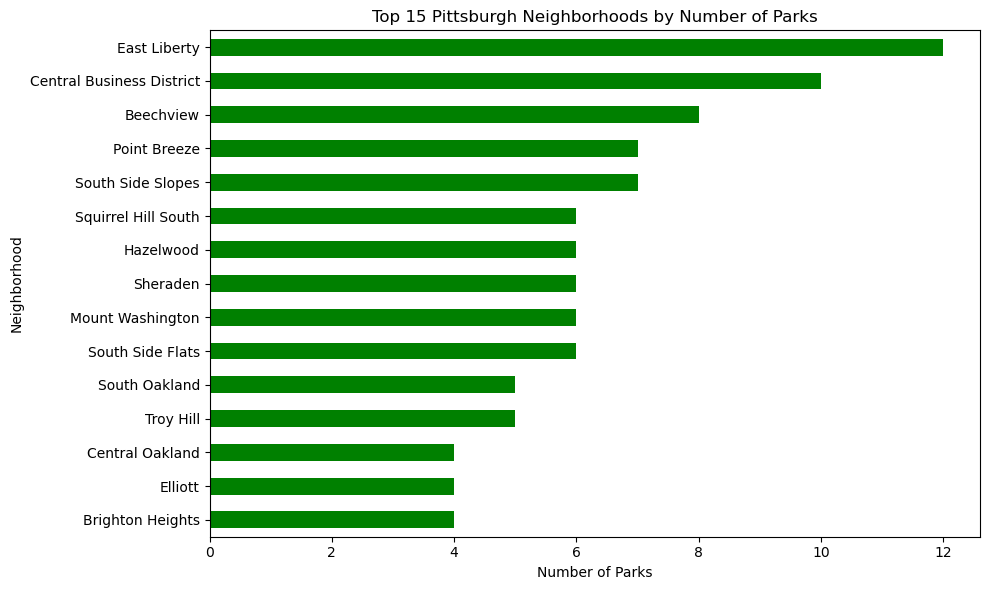

Cleaned CSV exported: parks_count_by_neighborhood.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# --- Dataset URL ---
DATA_URL = "https://data.wprdc.org/dataset/parks/resource/fa329e3d-89ff-4708-8ddf-81bfedcad11d/download/parks.csv"

# Load the dataset
parks = pd.read_csv(DATA_URL)
print("Rows, cols:", parks.shape)
print("Columns:", parks.columns.tolist())

# Inspect first rows
parks.head()

# Identify neighborhood-like columns
neigh_cols = [c for c in parks.columns if any(sub in c.lower() for sub in ['neigh', 'div', 'sector', 'ward'])]
print("Potential neighborhood columns:", neigh_cols)

# Choose the neighborhood column (update if different)
neighborhood_col = neigh_cols[0]  # usually 'DivName' or similar
print("Using neighborhood column:", neighborhood_col)

# Count the number of parks per neighborhood
parks_count_by_neigh = parks.groupby(neighborhood_col).size().reset_index(name='num_parks')

# Sort descending to find neighborhoods with most parks
parks_count_by_neigh = parks_count_by_neigh.sort_values(by='num_parks', ascending=False)
print("Top neighborhoods by number of parks:")
print(parks_count_by_neigh.head(15))

# Visualization: top 15 neighborhoods
top15 = parks_count_by_neigh.head(15).set_index(neighborhood_col)
plt.figure(figsize=(10,6))
top15['num_parks'].plot(kind='barh', color='green')
plt.xlabel('Number of Parks')
plt.ylabel('Neighborhood')
plt.title('Top 15 Pittsburgh Neighborhoods by Number of Parks')
plt.gca().invert_yaxis()  # highest at top
plt.tight_layout()
plt.show()

# Export cleaned result for later use
parks_count_by_neigh.to_csv("parks_count_by_neighborhood.csv", index=False)
print("Cleaned CSV exported: parks_count_by_neighborhood.csv")